# Árbol de decisión para especies de flores

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
data.shape

(150, 5)

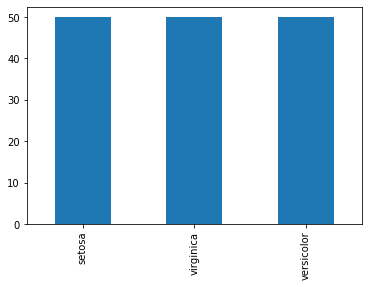

In [112]:
pd.Series(data.Species).value_counts().plot('bar')

In [113]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [114]:
colnames = data.columns.values.tolist()
predictors = colnames[:4] #variables predictoras
target = colnames[4] #variable objetivo(Species)

In [115]:
import numpy as np

In [116]:
#creamos la columna de distribucion univforme entre 0 y 1 para entrenar(un 75%)
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75 
data.is_train.head()

0    False
1     True
2     True
3    False
4    False
Name: is_train, dtype: bool

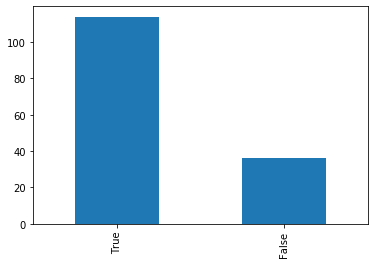

In [117]:
#plt.hist(data.is_train)
pd.Series(data.is_train).value_counts().plot('bar')

In [118]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99) 
#Entorpy (ver teoría)
#min_samples_split=20, son el minimo de muestras que queremos pillar, por defecto son 2(no recomendable)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [121]:
preds = tree.predict(test[predictors]) #usando el resultado de tree, vamos a predecir

In [122]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,12,1
virginica,0,1,8


* Todas las setosas se han calsificado como setosas(12).
* 13 versicolor se han calisficado como tal, menos 2 que se han calisficado como virginica.
* 14 virginicas se han clasificado como tal, menos 1 que se ha clasificado como versicolor.

## Visualización del árbol de decisión

In [141]:
from sklearn.tree import export_graphviz

In [130]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [131]:
import os
from graphviz import Source #tal vez tengamos que instalar en Anaconda la libreria graphviz (conda install graphviz)

In [132]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.35\\nentropy = 1.583\\nsamples = 114\\nvalue = [36, 37, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.75\\nentropy = 0.998\\nsamples = 78\\nvalue = [0, 37, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.85\\nentropy = 0.496\\nsamples = 46\\nvalue = [0, 5, 41]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.896\\nsamples = 16\\nvalue = [0, 5, 11]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 30\\nvalue = [0, 0, 30]"] ;\n4 -> 6 ;\n}'

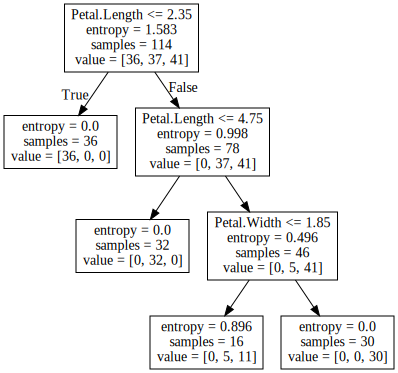

In [133]:
Source(text)

### Modo de lectura(arriba-->abajo):
* Flechas derechas son False, izquierdas True y value[setosa,versicolor,virginica].
* Tenemos 3 decisiones en este árbol. En 3 hojas el árbol ha sido capaz de identificar todas las catagorias.
* Vemos que la longitud de los sépalos le ha dado igual para clasificarlas.

**1-** Si la longitud de los petalos es <=2.35(felcha True), entonces la espacie es una Setosa.

**2-** Si 2.35(False)<anchura petalo<=4.75(True) la especie es virginica.

**3-** Si anchura petalo>4.75(flecha False) y el ancho del petalo es <=1.85(flecha True) es versicolor o virginica

**4-** Si anchura petalo>4.75(False) y el ancho del petalo >1.85(False) es virginica

## Cross Validation para la poda

In [134]:
X = data[predictors]
Y = data[target]

In [135]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [153]:
from sklearn.model_selection import KFold

In [155]:
cv = KFold(n_splits=10, shuffle=True, random_state=1) #cv=crossvalidation. n_splits=grupos de flores. shuffle para rastreo aleatorio

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [158]:
score = np.mean(scores)
score

0.9333333333333333

In [160]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [161]:
predictors #indice para ver que significa cada posicion del array que hay debajo del Score de la tabla de arriba

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest
* **Con RandomForestClassifier para problema de clasificación** *(al final de T7-2 se analiza para regresión)*


In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
#n_jobs es el numero de tareas en paralelo que se ejecutarán en el PC tanto para clasificar como predecir
#oob_score es una variable binaria. Con True el modelo hara un muestreo aleatorio para ralizar las predicciones
#n_estimators es el numero de estimadores es el numero de árboles que nuestro random Forests tendrá
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [168]:
forest.oob_decision_function_ #nos indica la probabilidad(0-1) array[setosa,versicolor,virginica]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [169]:
forest.oob_score_

0.9533333333333334